In [7]:
import math
now_path = !pwd
print(now_path)

['/Users/stella/dev/korean-audio-sentiment-analysis/preprocess']


In [9]:
!ls -al data

ls: data: No such file or directory


In [5]:
import glob
for filename in glob.glob('data/clip_*'):
    print(filename) 

In [6]:
import os
filelist = os.listdir('/Users/stella/dev/korean-audio-sentiment-analysis/model/data')

OSError: [Errno 2] No such file or directory: '/Users/stella/dev/korean-audio-sentiment-analysis/model/data'

In [13]:
print(filelist)

['.DS_Store', 'clip_13', 'clip_12']


In [14]:
item_num = len(filename)
print(item_num)
check = 0
name_l = []
for i in range(item_num):
    if filename[i-2]=='p' and filename[i-1]=='_':
        check = 1
    if check == 1:
        name_l.append(filename[i])

print(name_l)

12
['1', '2']


# read audio

In [22]:
from __future__ import print_function

In [1]:
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

/Users/stella/anaconda2/lib/python2.7/site-packages/librosa/__init__.py:40: DeprecationWarning: You are using librosa with Python 2. Please note that librosa 0.7 will be the last version to support Python 2, after which it will require Python 3 or later.
  DeprecationWarning)


In [2]:
!ls '/Users/stella/dev/korean-audio-sentiment-analysis/model/data/clip_13'

ls: /Users/stella/dev/korean-audio-sentiment-analysis/model/data/clip_13: No such file or directory


In [4]:
audio_path = '/Users/stella/dev/korean-audio-sentiment-analysis/model/data/clip_13/clip_13.mp4' #자동화
y, sr = librosa.load(audio_path)
print(sr)
print(y.shape)
print(y)

IOError: [Errno 2] No such file or directory: '/Users/stella/dev/korean-audio-sentiment-analysis/model/data/clip_13/clip_13.mp4'

# Melspectrogram

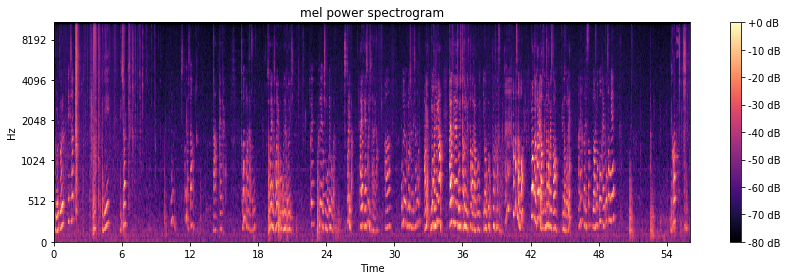

In [29]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

# MFCC

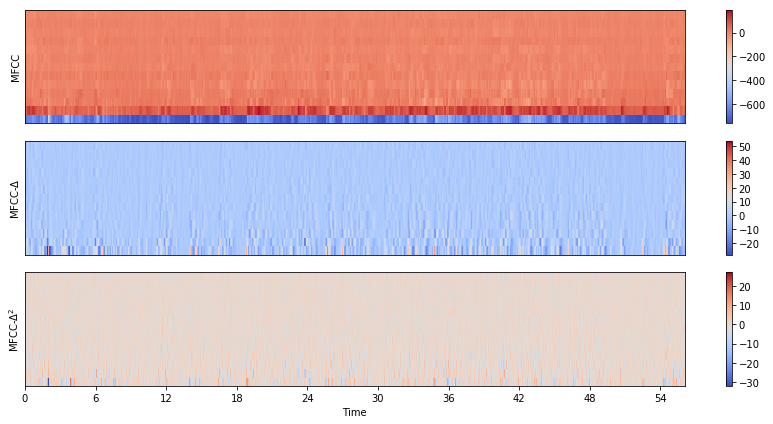

In [30]:

# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

# parsing label

In [31]:
import json

In [41]:
open('/Users/stella/dev/korean-audio-sentiment-analysis/model/data/clip_13.json','r') as f 
json_loaded = json.load()
print(json.dumps(json_loaded, indent=2, sort_keys=True, ensure_ascii=False))

SyntaxError: invalid syntax (<ipython-input-41-017707dbc7c3>, line 1)